<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
    
</CENTER>
<font size="5"></br> Copernicus Master on Digital Earth</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>October 20th 2020</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>
</CENTER>

</div>

# Lab Session: Dimension reduction

The goal of this lab is to get familiar with the concept of dimension reduction and visualization for high-dimensional data, using Principal Component Analysis (PCA)

### Assignment by: *Lisah Khadiala Ligono*

Date: 27 December 2023

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.decomposition import PCA

# Principal Component Analysis

The goal of this section is to perform PCA on a real hyperspectral dataset to see how it can help visualize, compress and interpret high dimensional remote sensing data. We will make use of the functions implemented in sci-kit learn, the standard Machine Learning Package for Python.

The data is provided courtesy of Naoto Yokoya and Japan Space Systems (only for this lab, please do not distribute). See

Matsuki, T., Yokoya, N., & Iwasaki, A. (2015). Hyperspectral tree species classification of Japanese complex mixed forest with the aid of LiDAR data. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 8(5), 2177-2187.

for more details.

First we load and visualize the data:

(207, 268)


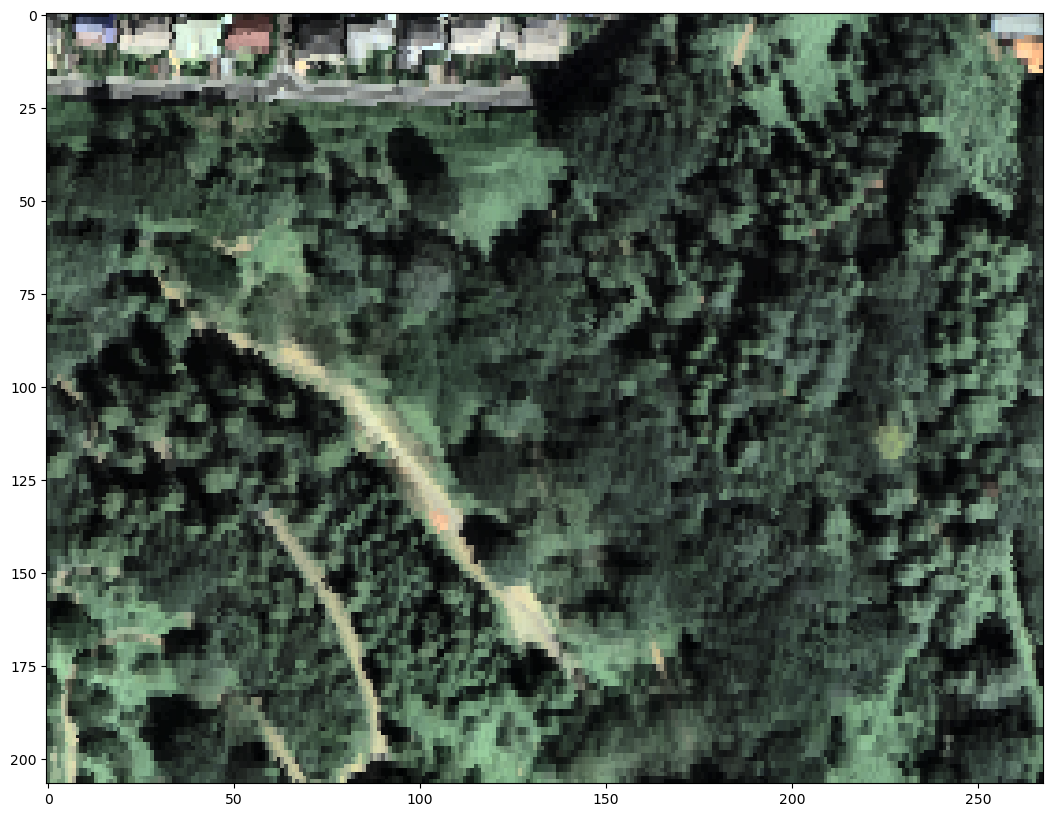

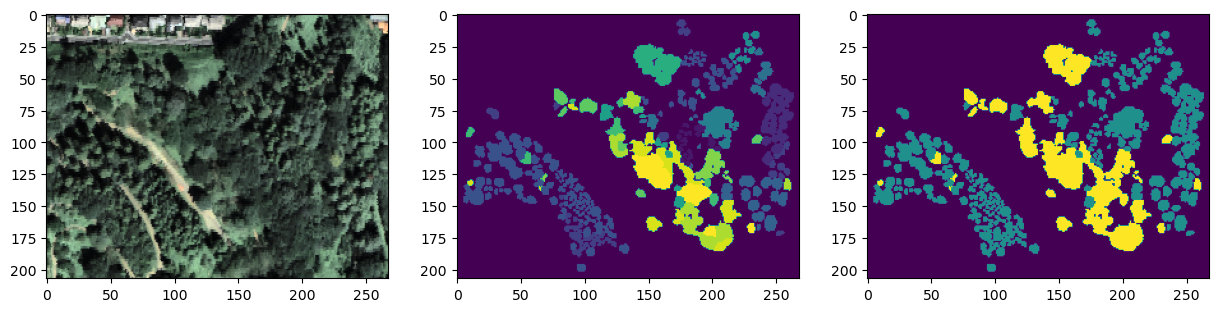

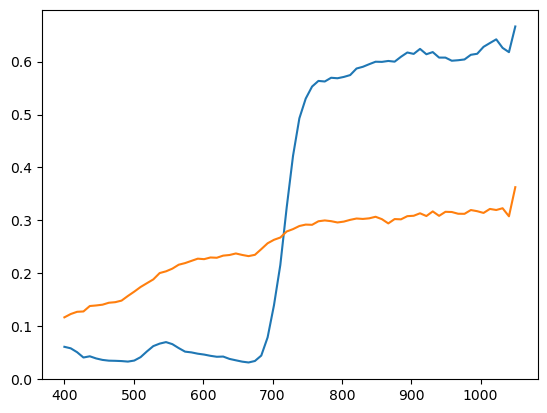

In [2]:
data = sio.loadmat("CASI3_North.mat")
rgb_data = sio.loadmat("rgb.mat")
classinfo = sio.loadmat("GT_North.mat")

wavelengths = np.linspace(400,1050,72) # 72 wavelenghts in the visible and near IR

im = data['hyper'].astype("double")


im = (im - np.amin(im))/(np.amax(im) - np.amin(im)) # rescale data between 0 and 1

imrgb = rgb_data['rgb_adjust']

class_img = classinfo['class']

# get labels for both classes: conifer trees and broadleaf trees

binary_class_img = np.zeros(np.shape(class_img))

print(binary_class_img.shape)

binary_class_img[class_img <=9] = 1 # conifer
binary_class_img[class_img >9] = 2 # broadleaf
binary_class_img[class_img == 0] = 0 # unclassified


# display

plt.figure(figsize=(15,10))
plt.imshow(imrgb)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imrgb)
plt.subplot(132)
plt.imshow(class_img)
plt.subplot(133)
plt.imshow(binary_class_img)

plt.figure()
plt.plot(wavelengths, im[50,50,:]) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:]) # one man made pixel

**Q: What are the main broad classes of materials that are present in the image?**

The main broad classes I can observe from the plot above is a `vegetation class` with the blue curve and a `non-vegetation class` with the orange curve

(72, 7726)
(72, 4895)


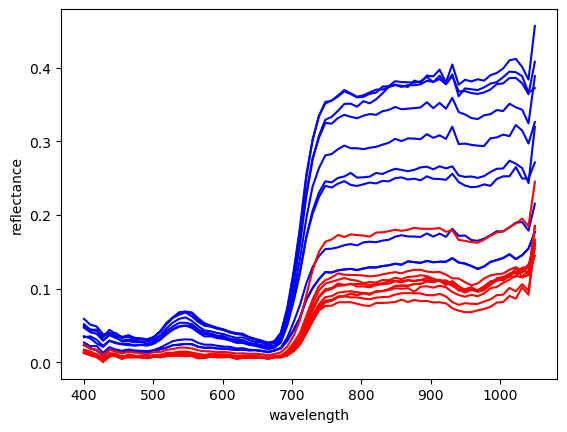

555.6338028169014
702.1126760563379


In [3]:
# %matplotlib qt
%matplotlib inline

[m,n,L] = np.shape(im)
im_r = np.reshape(im,(m*n,L)).T # we reshape the data cube into a matrix of size LxN, with L the number
# of wavelgnths and N the number of pixels

conifer_pixels = im[binary_class_img == 1,:].T
print(conifer_pixels.shape)

broadleaf_pixels = im[binary_class_img == 2,:].T
print(broadleaf_pixels.shape)


plt.figure()
plt.plot(wavelengths,conifer_pixels[:,0:10], 'b')
plt.plot(wavelengths,broadleaf_pixels[:,0:10],'r')
plt.xlabel('wavelength')
plt.ylabel('reflectance')
plt.show()

print(wavelengths[17])
print(wavelengths[33])

**Q: What are the main differences between spectra of conifer and broadleaf trees?**

- The major difference is the higher reflectance value the conifer trees have between wavelength 700-1000 as compared to the broadleaf trees
- Also, between wavelenths 500-600, the conifer trees have a higher refletance.

**Q: First plot the mean value of the data (the mean spectrum over all pixels). Does it look more like a vegetation spectrum or the spectrum of some man-made material? Why?**

- The plot looks more like the vegetation spectrum. I presume it is due to the fact that 90% of the image is covered by vegetation as compared to the man-made materials

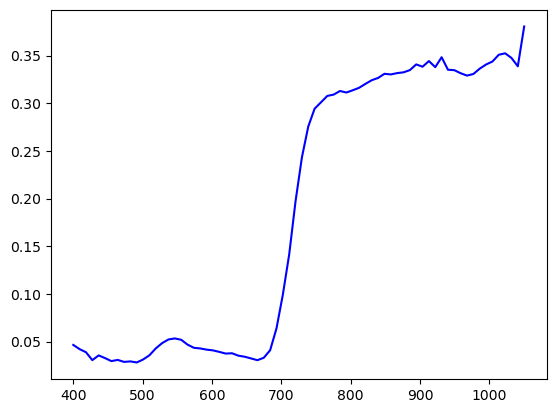

In [4]:
## TO DO ##
plt.figure()
plt.plot(wavelengths, np.mean(im_r, axis=1).T, 'b')

We will use the built-in scikit learn functions to represent the principal components and the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Q: Use the PCA class to compute the decomposition, using pca.fit, with 72 components (all of them).\
Plot the eigenvalues, together with the explained variance as functions of the component number, you can recover them with pca.singular_values_ and pca.explained_variance_ratio_.**

**Similarly, use pca.components to recover the components, and plot them. What do they look like and what are their dimensions?** 

**Finally, compute the coefficients of the decomposition using pca.transform. What are their dimensions?**

**You can represent them as images, if you reshape them (use the function numpy.reshape for that).**

**Can you interpret some of the components using the coefficients as well as the components themselves (what do they represent)?**


In [5]:
# PCA components
# Compute the PCA
n_components = 72
pca = PCA(n_components=n_components)

# Fit PCA
## TO DO ##
pca.fit(im_r)
# Get eigenvalues
## TO DO ##
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

[1.47324733e+03 3.62467888e+00 1.72220729e+00 6.27561745e-01
 4.47893489e-01 1.98826500e-01 1.20136813e-01 8.63862122e-02
 5.85514951e-02 3.79267548e-02 3.44825175e-02 2.11165986e-02
 1.97371455e-02 1.38219037e-02 1.23705649e-02 1.10534564e-02
 9.39788080e-03 8.13630863e-03 6.66868780e-03 6.20557643e-03
 6.13120213e-03 5.10707820e-03 4.57238025e-03 4.25158416e-03
 4.19513026e-03 3.81234661e-03 3.58788761e-03 3.45396623e-03
 3.39172185e-03 3.23822974e-03 3.04492818e-03 2.91211779e-03
 2.89198404e-03 2.67066379e-03 2.60590608e-03 2.48576090e-03
 2.32228950e-03 2.26297889e-03 2.10479124e-03 1.99090276e-03
 1.93897388e-03 1.88132853e-03 1.86118393e-03 1.74318932e-03
 1.46015269e-03 1.31399393e-03 1.11318208e-03 1.00312093e-03
 8.34017622e-04 6.88358713e-04 5.46062486e-04 4.94097963e-04
 4.45554975e-04 3.93780778e-04 3.76833859e-04 3.53113806e-04
 2.99568773e-04 2.52703869e-04 2.41029463e-04 2.34403625e-04
 2.20090179e-04 2.07565338e-04 1.97098017e-04 1.74062124e-04
 1.69507474e-04 1.589831

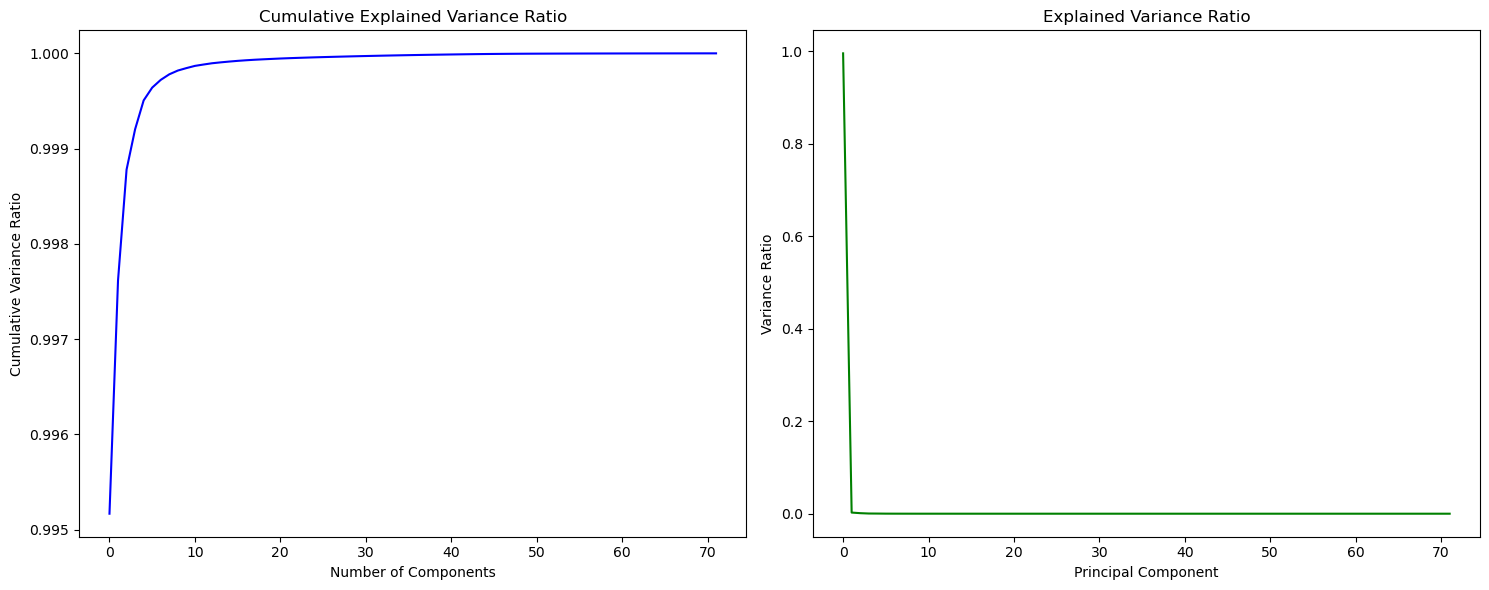

In [6]:
# display
## TO DO ##
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(cum_var, 'b')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_, 'g')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')

plt.tight_layout()
plt.show()

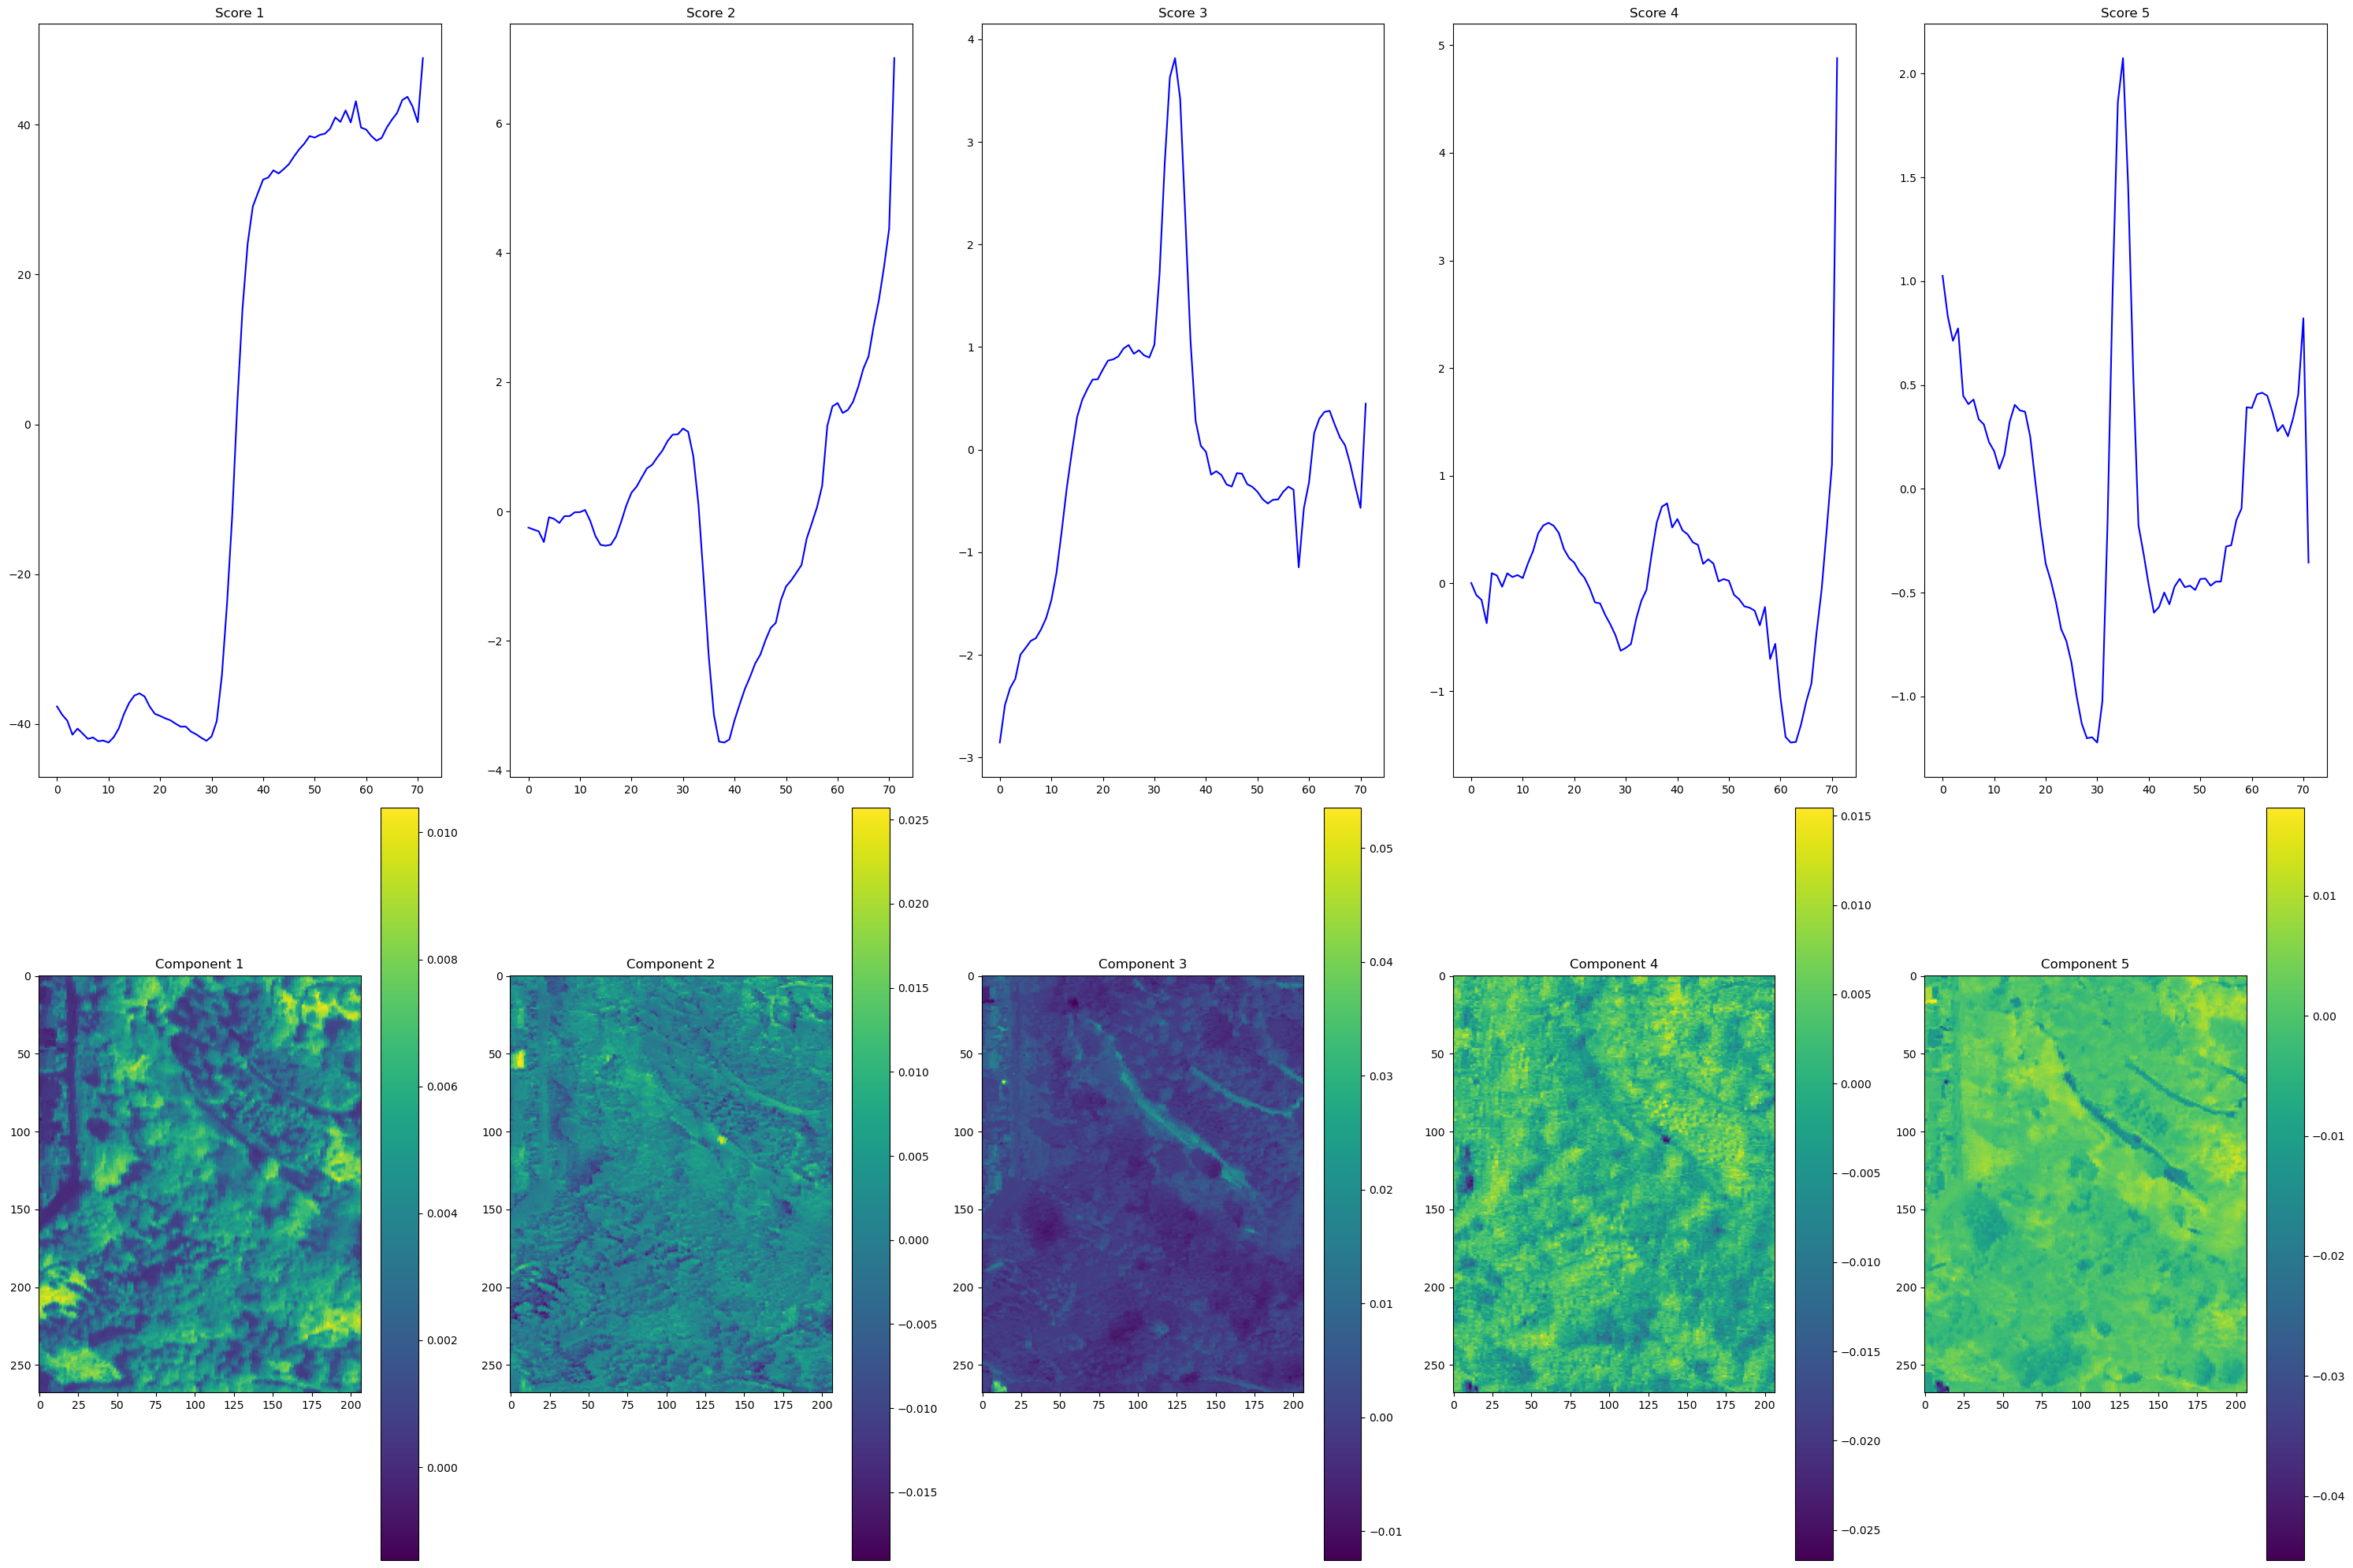

In [ ]:
# display principal components and coefficients
n_components_displayed = 5

# get components and plot the first few of them
components = pca.components_

# get scores (coefficients)
scores = pca.transform(im_r)

# display both components and scores together
plt.figure(figsize=(30, 20))
for i in range(n_components_displayed):
    plt.subplot(2, n_components_displayed, n_components_displayed + i + 1)
    plt.imshow(components[i, :].reshape(m, n).T, cmap='viridis')  # Display components
    plt.colorbar()
    plt.title(f"Component {i + 1}")

    plt.subplot(2, n_components_displayed, i + 1)
    plt.plot(scores[:, i], color='blue')  # Plot scores
    plt.title(f"Score {i + 1}")

plt.tight_layout()
plt.show()


**Q: Almost all the variance in the data is explained by only a few components: are they interpretable? What parts of the image do they explain, respectively?**

The principal components capturing most variance in the data represent combinations of spectral patterns across the image, where the weights of wavelengths within these components indicate their influence on distinct spectral characteristics or materials present in the hyperspectral image.

We define a function to enhance the brigthness of an RGB image:

In [8]:
# from skimage import color, exposure

def enhance_brightness_rgb(rgb_original):
    yuv= color.rgb2yuv(rgb_original) # change color space to radiance, chrominance
    p_low, p_high = np.percentile(yuv[:,:,0], (0.1,99.9)) # saturate outlier values in radiance (0.1,99.9)
    yuv[:,:,0] = exposure.rescale_intensity(yuv[:,:,0], in_range=(p_low, p_high)) # rescale radiance
    mod_rgb =  color.yuv2rgb(yuv) # transform back to rgb space
    return mod_rgb


**Q: The dataset can be projected in the 2D latent space given by the first 2 principal components (each pixel is represented only by the first two coefficients of the PCA decomposition). Make a scatterplot of the data points in the space spanned by the first 2 eigenvectors. Can you locate vegetation pixels, and others?**

You can use as colors the binary image with the class labels to spot conifer and broadleaf pixels.

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(## TO DO ## , c = binary_class_img.ravel(),s=(1+(binary_class_img.ravel()!= 0)))

**Q: Reconstruct the image using 1,2,5,10 and 72 components. Visually assess and describe in each case how well the data is reconstructed (e.g. by comparing the reconstructed rgb image with the true one, or plotting reconstructed spectra). Compute the mean absolute error in each pixel in each case**

The reconstruction for all data points using K components can be obtained by computing:
\begin{equation*}
\hat{\mathbf{X}} = \bar{\mathbf{X}} + \mathbf{U}_{K}\mathbf{A}_{K} 
\end{equation*}
where $\hat{\mathbf{X}}\in\mathbb{R}^{D\times N}$, and  $\mathbf{U}\in \mathbb{R}^{D\times K}$, and $\mathbf{A}^{K\times N}$. $\bar{\mathbf{X}}\in\mathbb{R}^{D\times N}$ is  a matrix containing the mean of the data in each column.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(72, 55476)
(72, 72)
(72,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


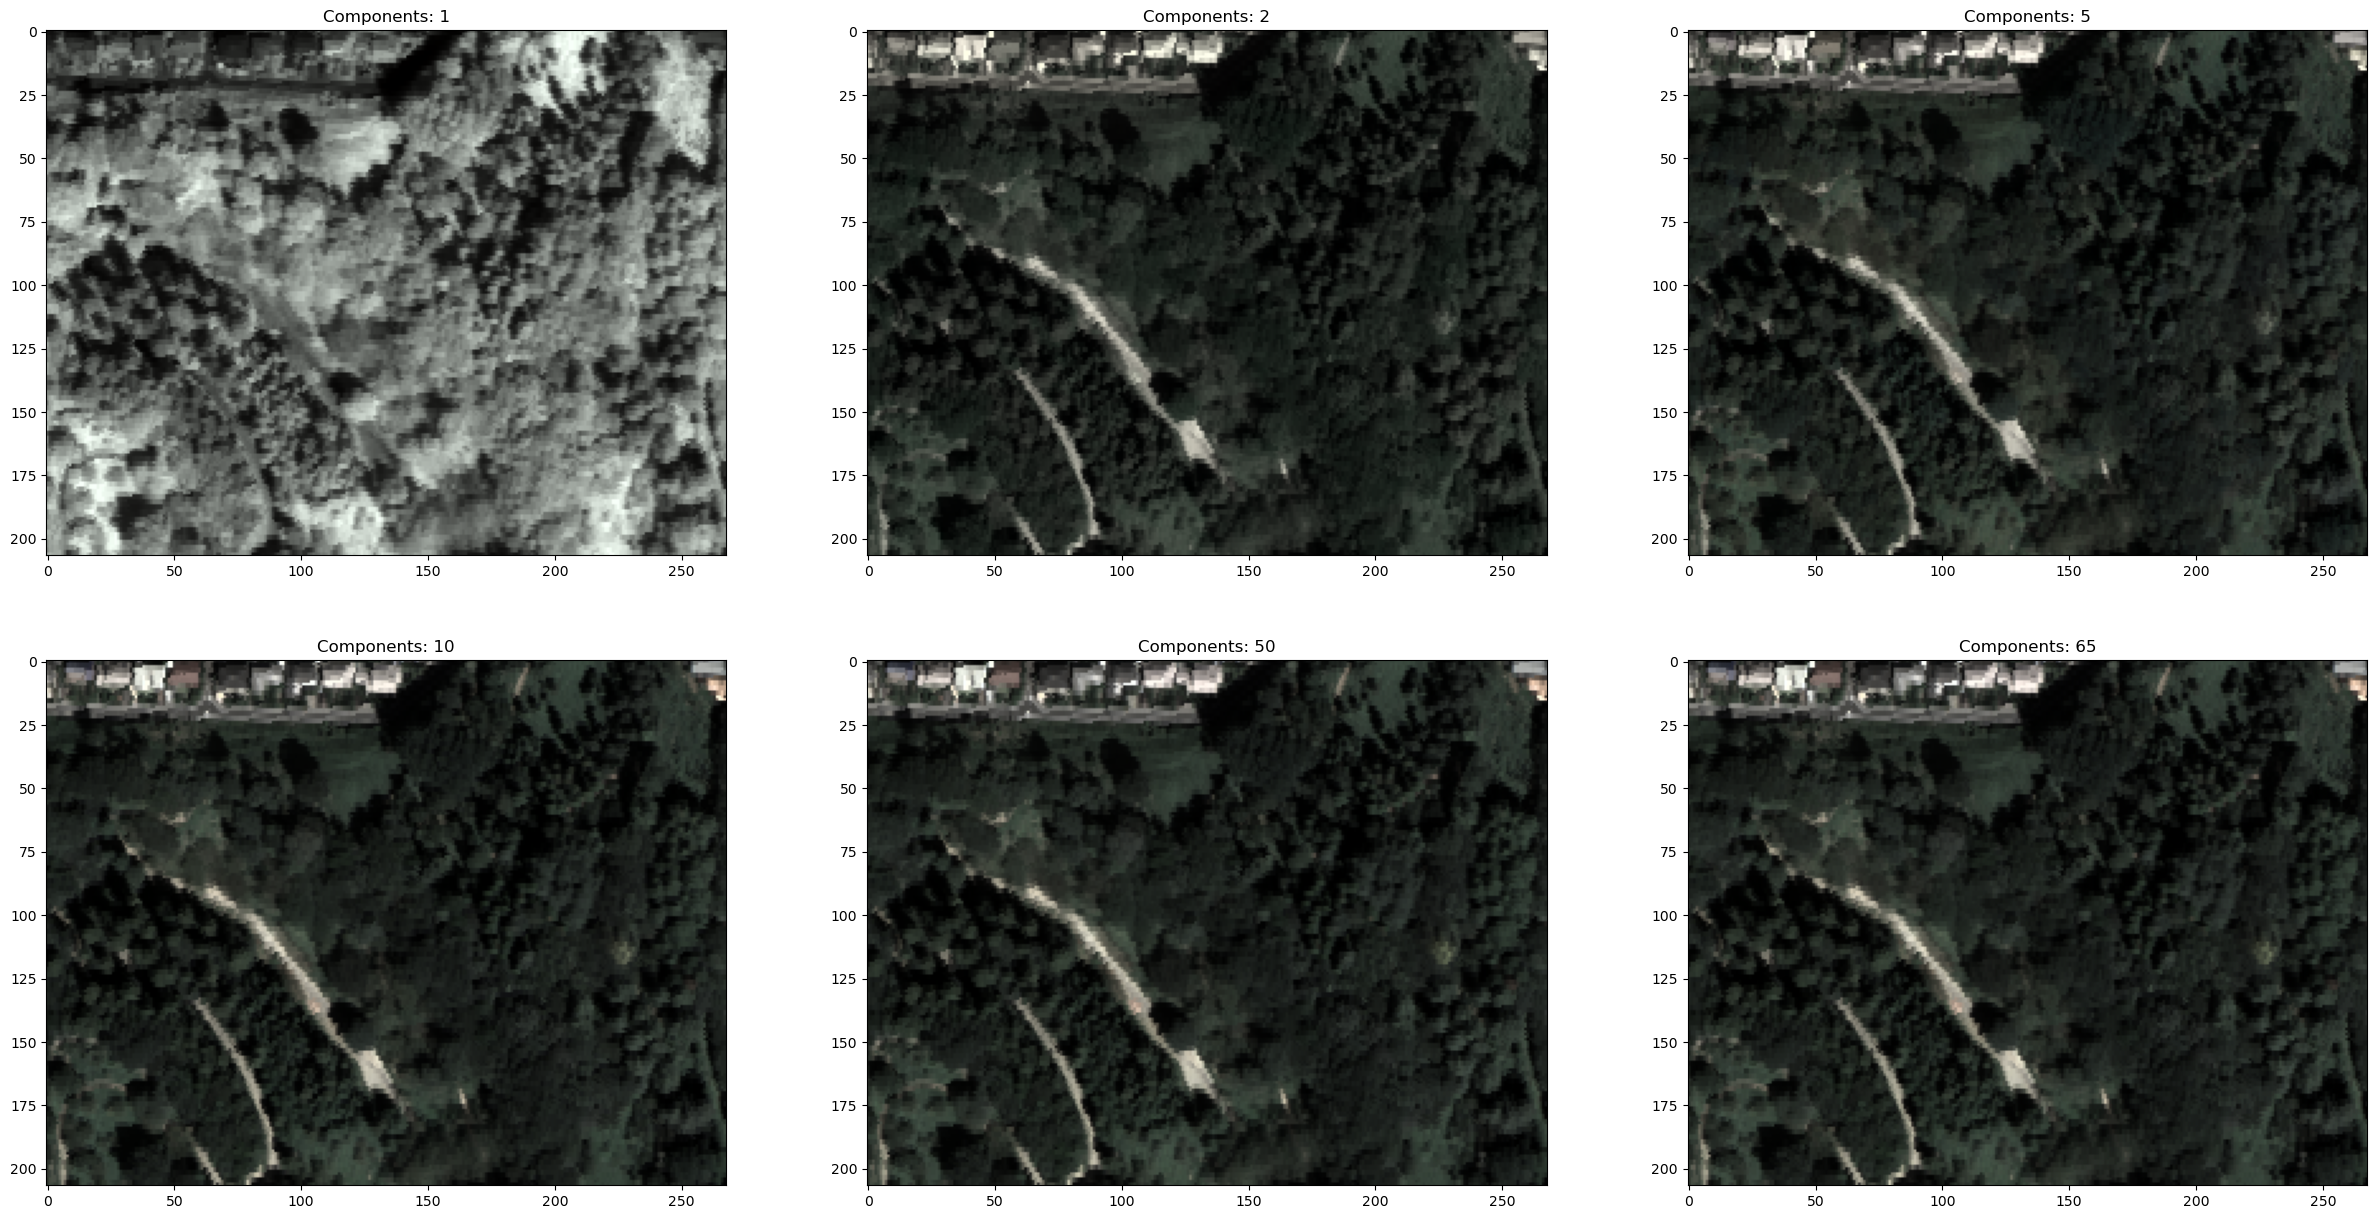

In [12]:
# rgb image
[m,n,L]=np.shape(im)
im_r2 = np.reshape(im, (m*n,L)) # without transpose
k = [1,2,5,10,50,65]

print(components.shape)
print(scores.shape)
print(mean.shape)

plt.figure(figsize =(30,15))

for i in range(len(k)):
    plt.subplot(2,3,i+1)
    pca_im = PCA(k[i]).fit(im_r2)
    img_3 = pca_im.transform(im_r2) 
    reconstructed_image = pca_im.inverse_transform(img_3)
    rec_im = np.reshape(reconstructed_image,(m,n,L))
    plt.imshow(enhance_brightness_rgb(rec_im[:,:,[29,18,6]]))# these are the RGB bands
    plt.title("Components: "+str(k[i]))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(72,)


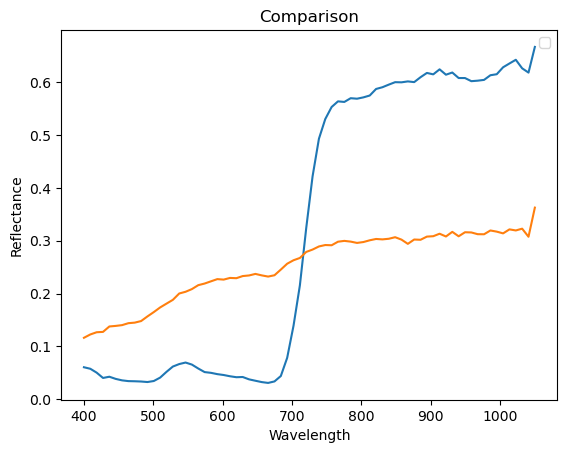

In [13]:
# keep 2 components
    
final_nbr = 2

# print( np.dot(components[:final_nbr,:].T,scores[:,:final_nbr].T).T.shape)
# print(components[:final_nbr,:].shape)

mean =  np.mean(im_r,axis = 1) 
print(mean.shape)

pca_im_final = PCA(final_nbr).fit(im_r)
img_final = pca_im_final.transform(im_r)
reconstructed_image_final = pca_im_final.inverse_transform(img_final)
rec_im_final = np.reshape(reconstructed_image_final,(m,n,L))

# absolute difference

## TO DO ##
abs_diff_final = np.abs(im - rec_im_final)
# pixel reconstruction

plt.figure()
plt.plot(wavelengths, im[50,50,:]) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:]) # one man made pixel
## TO DO ##
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Comparison')
plt.legend()
plt.show()

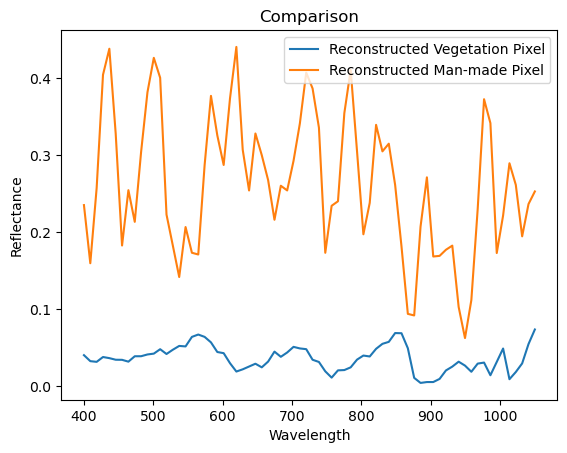

In [14]:
# Pixel reconstruction comparison
plt.figure()
plt.plot(wavelengths, rec_im_final[50, 50, :], label='Reconstructed Vegetation Pixel')
plt.plot(wavelengths, rec_im_final[112, 90, :], label='Reconstructed Man-made Pixel')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Comparison')
plt.legend()
plt.show()


**Q: Finally, take a look at the last components and the associated coefficients. Are the components easy to interpret? How about the coefficients: what do they look like? Is it worth it to keep all the components (give 2 reasons why or why not)**

The results show that the components and the coefficients are not easy to interpret and they look like noise and I think in this case it will not be good to keep all the components because:
1. it appears as though all the information is in the first few components and 
2. it will remove redundancy. 

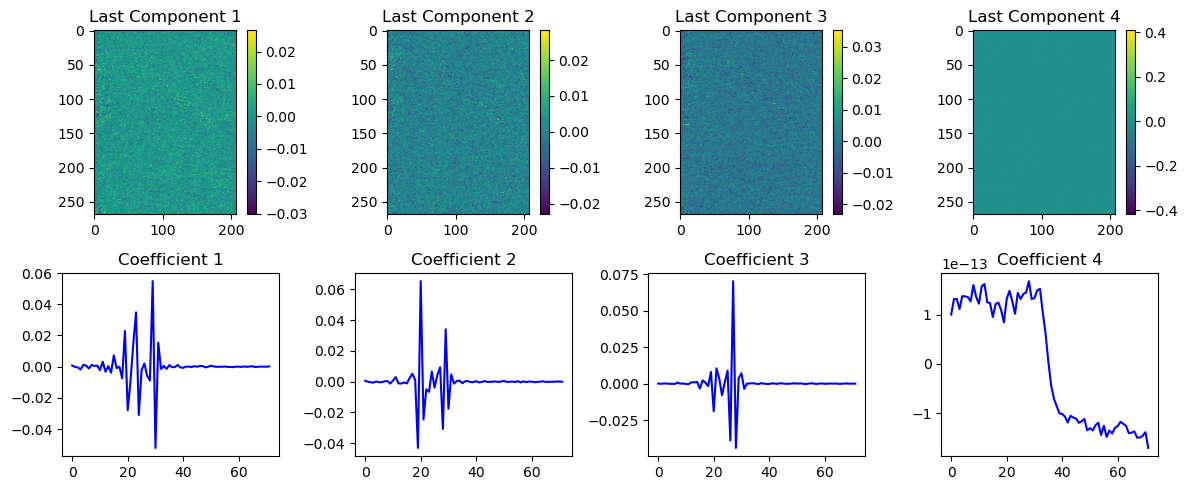

In [15]:
# last components

## TO DO ##
num_comp = 4  # inspecting the last 4 components

# Get the last components
last_components = components[-num_comp:, :]

# Get the associated coefficients for the last components
last_coefficients = scores[:, -num_comp:]

# Visualize the last components and their coefficients
plt.figure(figsize=(12, 5))
for i in range(num_comp):
    plt.subplot(2, num_comp, i + 1)
    plt.imshow(last_components[i, :].reshape(m, n).T, cmap='viridis')
    plt.colorbar()
    plt.title(f"Last Component {i + 1}")

    plt.subplot(2, num_comp, num_comp + i + 1)
    plt.plot(last_coefficients[:, i], color='blue')
    plt.title(f"Coefficient {i + 1}")

plt.tight_layout()
plt.show()

**Q: Bonus: Now perform a new PCA decomposition using only as a dataset the set of labeled pixels. Plot the dataset in the 2D space spanned by the first two components. What can you say about the new components and the separability of both classes rather than in the PCA space of the whole dataset?**

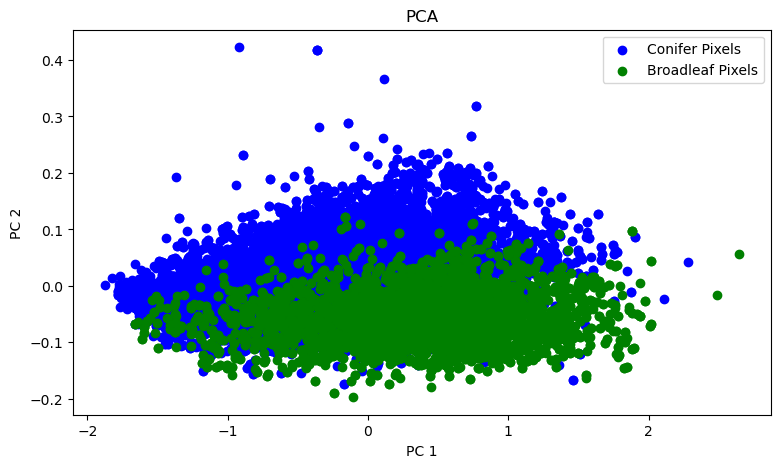

In [16]:
# # %matplotlib qt
# %matplotlib inline

# Number of conifer and broadleaf pixels
nb_conifer_pixels = conifer_pixels.shape[1]
nb_broadleaf_pixels = broadleaf_pixels.shape[1]

new_data = np.concatenate((conifer_pixels, broadleaf_pixels), axis=1)

# Compute the PCA
## TO DO ##
pca_new = PCA(n_components=2) 
pca_new.fit(new_data.T) 

# Data transformation
trans_new = pca_new.transform(new_data.T)

# Plot
plt.figure(figsize=(9, 5))
plt.scatter(trans_new[:nb_conifer_pixels, 0], trans_new[:nb_conifer_pixels, 1], c='blue', label='Conifer Pixels')
plt.scatter(trans_new[nb_conifer_pixels:, 0], trans_new[nb_conifer_pixels:, 1], c='green', label='Broadleaf Pixels')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.legend()
plt.show()

The PCA visualization in the 2D space indicates a slight separation between conifer and broadleaf pixels, with a notable clustering of conifer pixels along PC 2. This suggests some class discrimination potential in this reduced space, however, not very distinctive.